In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

In [2]:
# convert the str to list
stranimal="Dog,Cow,Cat,Horse,Donkey,Tiger,Lion,Elephant,Polar_bear,Turtle,Crocodile,Rabbit,Porcupine,Hen,Fish,Dolphin,Frog,Alligator,Fox,Bear,Gorilla,Monkey,Chameleon,Jaguar,Kangaroo"
# Split the string into a list of words
animals_list = stranimal.split(',')
# Print the list of words
animals_list=pd.Series(animals_list)
animals_list

0            Dog
1            Cow
2            Cat
3          Horse
4         Donkey
5          Tiger
6           Lion
7       Elephant
8     Polar_bear
9         Turtle
10     Crocodile
11        Rabbit
12     Porcupine
13           Hen
14          Fish
15       Dolphin
16          Frog
17     Alligator
18           Fox
19          Bear
20       Gorilla
21        Monkey
22     Chameleon
23        Jaguar
24      Kangaroo
dtype: object

In [3]:
# converting str to list :
strhabitat="Varied,Farm,Varied,Varied,Varied,Forests,Grasslands,Varied,Arctic,Varied,Freshwater,Varied,Forests,Domestic,Varied,Oceans,seas,Freshwater,Freshwater,Varied,Varied,Dense_forests,Varied,Trees,Rainforests,woodlands"
hab_list=strhabitat.split(',')
# convert to series
hab_list=pd.Series(hab_list) 
hab_list

0            Varied
1              Farm
2            Varied
3            Varied
4            Varied
5           Forests
6        Grasslands
7            Varied
8            Arctic
9            Varied
10       Freshwater
11           Varied
12          Forests
13         Domestic
14           Varied
15           Oceans
16             seas
17       Freshwater
18       Freshwater
19           Varied
20           Varied
21    Dense_forests
22           Varied
23            Trees
24      Rainforests
25        woodlands
dtype: object

In [5]:
df=pd.DataFrame()
df['Animals']=animals_list
df['Habitats']=hab_list
df

,Animals,Habitats
0,Dog,Varied
1,Cow,Farm
2,Cat,Varied
3,Horse,Varied
4,Donkey,Varied
5,Tiger,Forests
6,Lion,Grasslands
7,Elephant,Varied
8,Polar_bear,Arctic
9,Turtle,Varied


In [7]:
df.shape

(25, 2)

In [8]:
df[df['Animals']=="Donkey"]

,Animals,Habitats
4,Donkey,Varied


In [9]:
# encoding
le = LabelEncoder()
df["Habitats_encoded"] = le.fit_transform(df["Habitats"])

# Select features for clustering
X = df[["Habitats_encoded"]]
X

,Habitats_encoded
0,10
1,3
2,10
3,10
4,10
5,4
6,6
7,10
8,0
9,10


In [10]:
# Perform hierarchical clustering
k = 3  # You can adjust the number of clusters as needed
agg_clustering = AgglomerativeClustering(n_clusters=k)
df["Cluster"] = agg_clustering.fit_predict(X)
df

,Animals,Habitats,Habitats_encoded,Cluster
0,Dog,Varied,10,1
1,Cow,Farm,3,2
2,Cat,Varied,10,1
3,Horse,Varied,10,1
4,Donkey,Varied,10,1
5,Tiger,Forests,4,0
6,Lion,Grasslands,6,0
7,Elephant,Varied,10,1
8,Polar_bear,Arctic,0,2
9,Turtle,Varied,10,1


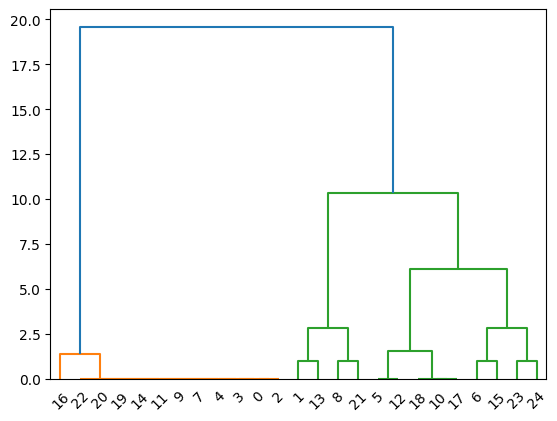

In [11]:
# Calculate the linkage matrix using the 'ward' method
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
dendrogram(linkage_matrix)
plt.show()

